# Определение перспективного тарифа для телеком-компании

Коммерческому департаменту необходимо понять, какой тариф лучше подходит для компании. Сравнение необходимо провести по двум тарифным планам: `«Смарт»` и `«Ультра»`. Результаты анализа будут использованы для корректировки рекламного бюджета.

**Цель анализа** - на основе предоставленных данных проанализировать поведение клиентов и сделать вывод о том, какой тариф приносит больше денег компании. В ходе анализа предстоит проверить две гипотезы:
1. Средняя выручка пользователей тарифов `«Ультра»` и `«Смарт»` различаются.
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Описание тарифов**

**Тариф «Смарт»**

1. Ежемесячная плата: `550` рублей.
2. Включено `500` минут разговора, `50` сообщений и `15` Гб интернет-трафика.
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: `3` рубля;
    * сообщение: `3` рубля;
    * 1 Гб интернет-трафика: `200` рублей.

**Тариф «Ультра»**

1. Ежемесячная плата: `1950` рублей.
2. Включено `3000` минут разговора, `1000` сообщений и `30` Гб интернет-трафика.
3. Стоимость услуг сверх тарифного пакета:
   * минута разговора: `1` рубль;
   * сообщение: `1` рубль;
   * 1 Гб интернет-трафика: `150` рублей.


Анализ необходимо провести на небольшой выборке клиентов. Все предоставленные для анализа данные находятся в пяти файлах:
* `calls.csv` - информация о звонках;
* `internet.csv` - информация об интернет-сессиях;
* `messages.csv` - информация о соощениях;
* `tariffs.csv` - информация о тарифах;
* `users.csv` - информация о пользователях.

**Описание данных из предоставленных файлов**

* **Таблица** **`users`** (информация о пользователях):
    * `user_id` — уникальный идентификатор пользователя;
    * `first_name` — имя пользователя;
    * `last_name` — фамилия пользователя;
    * `age` — возраст пользователя (годы);
    * `reg_date` — дата подключения тарифа (день, месяц, год);
    * `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
    * `city` — город проживания пользователя;
    * `tarif` — название тарифного плана.


* **Таблица** **`calls`** (информация о звонках):
    * `id` — уникальный номер звонка;
    * `call_date` — дата звонка;
    * `duration` — длительность звонка в минутах;
    * `user_id` — идентификатор пользователя, сделавшего звонок.


* **Таблица** **`messages`** (информация о сообщениях):
    * `id` — уникальный номер сообщения;
    * `message_date` — дата сообщения;
    * `user_id` — идентификатор пользователя, отправившего сообщение.


* **Таблица** **`internet`** (информация об интернет-сессиях):
    * `id` — уникальный номер сессии;
    * `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);
    * `session_date` — дата интернет-сессии;
    * `user_id` — идентификатор пользователя.


* **Таблица** **`tariffs`** (информация о тарифах):
    * `tariff_name` — название тарифа;
    * `rub_monthly_fee` — ежемесячная абонентская плата в рублях;
    * `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату;
    * `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
    * `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
    * `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
    * `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета;
    * `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

О качестве данных ничего не известно, поэтому перед проверкой гипотез понадобится обзор данных и при необходимости их предобработка.

Исследование будет проведено в пять этапов:
1. Обзор и изучение данных.
2. Предобработка данных, дополнительные расчёты, композиция таблиц.
3. Анализ данных.
4. Проверка гипотез.
5. Формулирование выводов.

## Обзор и изучение данных

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import math
from scipy import stats as st
import matplotlib.pyplot as plt


# чтение файлов
calls_df = pd.read_csv('/datasets/calls.csv')
internet_df = pd.read_csv('/datasets/internet.csv')
messages_df = pd.read_csv('/datasets/messages.csv')
tariffs_df = pd.read_csv('/datasets/tariffs.csv')
users_df = pd.read_csv('/datasets/users.csv')

### Обзор данных о звонках (calls_df)

Посмотрим на сводную информацию, общий вид данных, проверим количество пропущенных значений и наличие дубликатов в данных в таблице `calls_df`. Также проверим данные на наличие аномалий и/или ошибок.

In [2]:
# просмотр сводной информации о данных из файла calls
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
# вывод первых строк данных из файла calls
display(calls_df.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
# вывод последних строк данных из файла calls
display(calls_df.tail())

,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


In [5]:
# проверка данных по длительности звонков в минутах на наличие аномалий и/или ошибок
calls_df['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [6]:
# подсчёт количества пропущенных значений в файле calls
calls_df.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [7]:
# подсчёт количества звонков нулевой длительности в файле calls
calls_df[calls_df['duration'] == 0.0]['duration'].count()

39613

In [8]:
# подсчёт доли звонков нулевой длительности в файле calls по отношению ко всем данным
calls_df[calls_df['duration'] == 0.0]['duration'].count() / calls_df.shape[0]

0.19551644316336553

In [9]:
# подсчёт количества дубликатов в файле calls
calls_df.duplicated().sum()

0

* Таблица `calls_df` содержит `202607` записей. Данные соотвествуют описанию. Явных дубликатов не обнаружено. Нарушений змеиного стиля заголовков не обнаружено.
* Тип данных, связанный с датой, соотвествует `object`. Для работы с датами более удобен формат `datetime`, к которому необходимо привести столбец `call_date`.
* Обнаружено `19.6%` звонков с нулевой длительностью. Согласно описанию данных, это не является ошибкой, так как подобным образом обозначены пропущенные звонки.
* Присуствует столбец `id`, содержащий записи вида `1000_0`, в которых информация, заключённая в части до нижнего подчёркивания соотвествует данным из столбца `user_id`. Так как данные дублируются, эту часть можно отбросить вместе с разделителем в виде нижнего подчёркивания. Оставшаяся часть записи после нижнего подчёркивания при этом будет соотвествовать идентификатору звонков.
* Аномальных и/или ошибочных данных в числовых значениях по столбцу длительности звонков в минутах `duration` не обнаружено.

### Обзор данных об интернет-сессиях (internet_df)

Посмотрим на сводную информацию, общий вид данных, проверим количество пропущенных значений и наличие дубликатов в данных в таблице `internet_df`. Также проверим данные на наличие аномалий и/или ошибок.

In [10]:
# просмотр сводной информации о данных из файла internet
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [11]:
# вывод первых строк данных из файла internet
display(internet_df.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [12]:
# вывод последних строк данных из файла internet
display(internet_df.tail())

,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [13]:
# проверка данных по объёму потраченного за сессию интернет-трафика (в мегабайтах) на наличие аномалий и/или ошибок
internet_df['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [14]:
# подсчёт количества пропущенных значений в файле internet
internet_df.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [15]:
# подсчёт количества дубликатов в файле internet
internet_df.duplicated().sum()

0

* Таблица `internet_df` содержит `149396` записей. Данные соотвествуют описанию. Явных дубликатов не обнаружено. Нарушений змеиного стиля заголовков не обнаружено.
* Тип данных, связанный с датой, соотвествует `object`. Для работы с датами более удобен формат `datetime`, к которому необходимо привести столбец `session_date`.
* В данных обнаружен столбец `Unnamed: 0`, который получился в результате сброса индексов в исходном датафрейме. Его можно удалить.
* Присуствует столбец `id`, содержащий записи вида `1000_0`, в которых информация, заключённая в части до нижнего подчёркивания соотвествует данным из столбца `user_id`. Так как данные дублируются, эту часть можно отбросить вместе с разделителем в виде нижнего подчёркивания. Оставшаяся часть записи после нижнего подчёркивания при этом будет соотвествовать идентификатору интернет-сессий.
* Аномальных и/или ошибочных данных в числовых значениях по столбцу с объёмом потраченного за сессию интернет-трафика в мегабайтах `mb_used` не обнаружено.

### Обзор данных о сообщениях (messages_df)

Посмотрим на сводную информацию, общий вид данных, проверим количество пропущенных значений и наличие дубликатов в данных в таблице `messages_df`. Также проверим данные на наличие аномалий и/или ошибок.

In [16]:
# просмотр сводной информации о данных из файла messages
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [17]:
# вывод первых строк данных из файла messages
display(messages_df.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [18]:
# вывод последних строк данных из файла messages
display(messages_df.tail())

,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


In [19]:
# подсчёт количества пропущенных значений в файле messages
messages_df.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [20]:
# подсчёт количества дубликатов в файле messages
messages_df.duplicated().sum()

0

* Таблица `message_df` содержит `123036` записей. Данные соотвествуют описанию. Явных дубликатов не обнаружено. Нарушений змеиного стиля заголовков не обнаружено.
* Тип данных, связанный с датой, соотвествует `object`. Для работы с датами более удобен формат `datetime`, к которому необходимо привести столбец `message_date`.
* В данных присуствует столбец `id`, содержащий записи вида `1000_0`, в которых информация, заключённая в части до нижнего подчёркивания соотвествует данным из столбца `user_id`. Так как данные дублируются, эту часть можно отбросить вместе с разделителем в виде нижнего подчёркивания. Оставшаяся часть записи после нижнего подчёркивания при этом будет соотвествовать идентификатору сообщений.

### Обзор данных о тарифах (tariffs_df)

Посмотрим на сводную информацию и общий вид данных в таблице `tariffs_df`.

In [21]:
# просмотр сводной информации о данных из файла tariffs
tariffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [22]:
# вывод первых строк данных из файла tariffs
display(tariffs_df.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [23]:
# подсчёт количества пропущенных значений в файле tariffs
tariffs_df.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [24]:
# подсчёт количества дубликатов в файле tariffs
tariffs_df.duplicated().sum()

0

* Таблица `tariffs_df` содержит `2` записи и по своей сути представляет собой словарь с описанием различных параметров тарифов. Данные соотвествуют описанию. Нарушений змеиного стиля заголовков не обнаружено.
* Согласно таблице тарифу `smart` присвоен индекс `0`, а тарифу `ultra` индекс `1`.

### Обзор данных о пользователях (users_df)

Посмотрим на сводную информацию, общий вид данных, проверим количество пропущенных значений и наличие дубликатов в данных в таблице `users_df`. Также проверим данные на наличие аномалий и/или ошибок.

In [25]:
# просмотр сводной информации о данных из файла users
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [26]:
# вывод первых строк данных из файла users
display(users_df.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [27]:
# проверка данных по возрасту на наличие аномалий и/или ошибок
users_df['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [28]:
# подсчёт количества пропущенных значений в файле users
users_df.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [29]:
# подсчёт доли пропущенных значений в файле users по отношению ко всем данным
users_df.isna().sum() / users_df.shape[0]

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

In [30]:
# подсчёт количества дубликатов в файле users
users_df.duplicated().sum()

0

* Таблица `users_df` содержит `500` записей. Данные соотвествуют описанию. Явных дубликатов не обнаружено. Нарушений змеиного стиля заголовков не обнаружено.
* Тип данных, связанный с датой, соотвествует `object`. Для работы с датами более удобен формат `datetime`, к которому необходимо привести столбцы `churn_date` и `reg_date`.
* В столбце `churn_date` обнаружено `92.4%` пропусков с информацией о дате прекращения пользования тарифом, что означает то, что для большей части пользователей тариф ещё действовал на момент выгрузки данных.
* Строковые значения `smart` и `ultra` по столбцу `tariff` для удобства следует заменить на `0` и `1`, в соотвествии с индексами тарифов из таблицы `tariffs_df`.
* Аномальных и/или ошибочных данных в числовых значениях по столбцу с возрастом клиентов `age` не обнаружено.

### Выводы по обзору данных

* Данные успешно загружены из предоставленных для анализа файлов. Данные соотвествуют предоставленному описанию и не имеют явных дубликатов.
* Изучена общая информация о таблицах, определены направления для преобразования данных перед их анализом.
* В процессе предобработки данных необходимо провести их дополнительное исследование для поиска скрытых проблем или ошибок, которые не были выявлены на этапе общего обзора и изучения данных.

## Предобработка данных, дополнительные расчёты, композиция таблиц

Произведём необходимые исправления в данных и устранение выявленных по результатам общего обзора проблем.

### Предобработка данных о звонках (calls_df)

В таблице `calls_df` дату звонка `call_date` приведём к типу `datetime`, чтобы иметь возможность в дальнейшем использовать встроенные в *pandas* методы для работы с датами.

In [31]:
# преобразование типа данных в столбце call_date таблицы calls_df к типу данных datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')

Обработаем записи в столбце `id`, создав для этого вспомогательную функцию `string_id_mod`.

In [32]:
# вспомогательная функция для удаления лишних данных в строковых значениях столбца id
def string_id_mod(row):
    """
    input: row - строка из датафрейма
    ouput: (object) - обработанная по столбцу `id` строка
    Функция принимает на вход строки с данными из датафрейма,
    получает данные в виде строк из стобца `id` вида `XXXX_X` и возвращает строку, в которой отброшено всё,
    что находится до нижнего подчёркивания, включая само нижнее подчёркивание.
    """
    string_id = row['id']
    return string_id[string_id.find('_') + 1:]

In [33]:
# обработка строк в столбце id с помощью вспомогательной функции string_id_mod
calls_df['id'] = calls_df.apply(string_id_mod, axis=1)

# переименование столбца id в calls_id
calls_df = calls_df.rename(columns={'id': 'calls_id'})

# преобразование типа данных в столбце calls_id к целочисленному типу
calls_df['calls_id'] = calls_df['calls_id'].astype('int64')

Проверим за какой период представлены данные в таблице `calls_df`.

In [34]:
# просмотр минимального и максимального значений даты в таблице calls_df
calls_df['call_date'].min(), calls_df['call_date'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00'))

Данные в таблице `calls_df` представлены за календарный год с `1 января 2018 года` по `31 декабря 2018 года`. С учётом того, что данные представлены за календарный год, логичным шагом будет визуализация распределения количества звонков по месяцам.

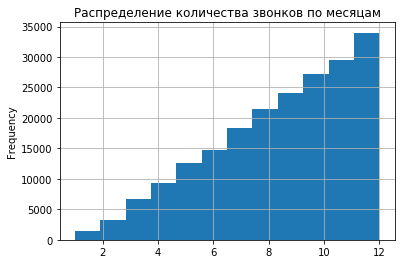

In [35]:
# вывод графика распределения количества звонков по месяцам
(
    calls_df['call_date'].dt.month
    .plot(kind='hist', bins=12, title='Распределение количества звонков по месяцам', grid=True)
);

Также посмотрим на распределение суммарной продолжительности звонков по месяцам. Для этого добавим к таблице новый столбец `month_call` с номером месяца, в котором состоялся звонок.

In [36]:
# добавление колонки month_call с номером месяца, в котором состоялся звонок, к исходной таблице
calls_df['month_call'] = calls_df['call_date'].dt.month

После добавления можно построить график распределения суммарной продолжительности звонков по месяцам.

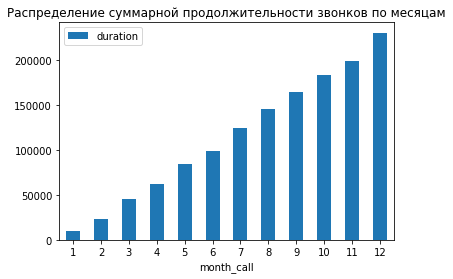

In [37]:
# вывод графика распределения суммарной продолжительности звонков по месяцам
(
    calls_df.groupby('month_call')
    .agg({'duration':'sum'})
    .reset_index()[['month_call', 'duration']]
    .plot(kind='bar', x='month_call', y='duration', rot=360,
          title='Распределение суммарной продолжительности звонков по месяцам')
);

Определим общее количество пропущенных звонков в имеющейся выборке.

In [38]:
print('Количество пропущенных звонков в выборке:', calls_df[calls_df['duration'] == 0].shape[0])

Количество пропущенных звонков в выборке: 39613


Построим график распределения продолжительности всех звонков, за исключением пропущенных.

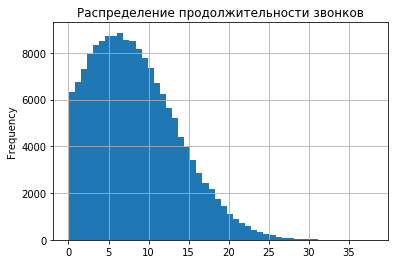

In [39]:
# вывод графика распределения продолжительности звонков
(
    calls_df[calls_df['duration'] != 0]['duration']
    .plot(kind='hist', bins=50, grid=True, title='Распределение продолжительности звонков')
);

Преобразуем столбец с длительностью звонков `duration` путём округления в большую сторону и преобразованием данных к целочисленному типу.

In [40]:
# округление данных о продолжительности звонков в большую сторону и приведение их к целочисленному типу
calls_df['duration'] = calls_df['duration'].apply(np.ceil).astype('int64')

В завершении предобработки данных таблицы `call_df` посмотрим на основные описательные статистики.

In [41]:
# вызов метода describe для просмотра описательных статистик данных в таблице calls_df
calls_df.describe()

,calls_id,duration,user_id,month_call
count,202607.000000,202607.000000,202607.000000,202607.000000
mean,308.577181,7.158198,1253.940619,8.574067
std,259.948786,5.959173,144.722751,2.787093
min,0.000000,0.000000,1000.000000,1.000000
25%,108.000000,2.000000,1126.000000,7.000000
50%,243.000000,6.000000,1260.000000,9.000000
75%,446.000000,11.000000,1379.000000,11.000000
max,1759.000000,38.000000,1499.000000,12.000000


* Данные в таблице `calls_df` с информацией о звонках представлены за период полного календарного `2018` года.
* Количество звонков по месяцам, а также их общая продолжительность растёт линейно на протяжении всего наблюдаемого периода. Расхождений нет.
* Распределение продолжительности звонков близко к распределению Пуассона. Данные скошены вправо. Среднее значение `6.8` немного больше медианного, равного `6.0`.
* Аномальных и/или ошибочных значений в данных не обнаружено.

### Предобработка данных об интернет-сессиях (internet_df)

В таблице `internet_df` дату интернет-сессий `session_date` приведём к типу `datetime`, чтобы иметь возможность в дальнейшем использовать встроенные в *pandas* методы для работы с датами.

In [42]:
# преобразование типа данных в столбце session_date таблицы internet_df к типу данных datetime
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')

Удалим столбец `Unnamed: 0`, образовавшийся после сброса индексов в таблице.

In [43]:
# удаление столбца Unnamed: 0
internet_df = internet_df.drop(['Unnamed: 0'], axis=1)

Обработаем записи в столбце `id`, отбросив в записях всё, что находится до нижнего подчёркивания, включая его самого.

In [44]:
# обработка строк в столбце id с помощью вспомогательной функции string_id_mod
internet_df['id'] = internet_df.apply(string_id_mod, axis=1)

# переименование столбца id в calls_id
internet_df = internet_df.rename(columns={'id': 'internet_session_id'})

# преобразование типа данных в столбце calls_id к целочисленному типу
internet_df['internet_session_id'] = internet_df['internet_session_id'].astype('int64')

Проверим за какой период представлены данные в таблице `internet_df`.

In [45]:
# просмотр минимального и максимального значений даты в таблице internet_df
internet_df['session_date'].min(), internet_df['session_date'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00'))

Данные в таблице `internet_df` представлены за календарный год с `1 января 2018 года` по `31 декабря 2018 года`. С учётом того, что данные представлены за календарный год, логичным шагом будет визуализация распределения объёма потраченного интернет-трафика по месяцам.

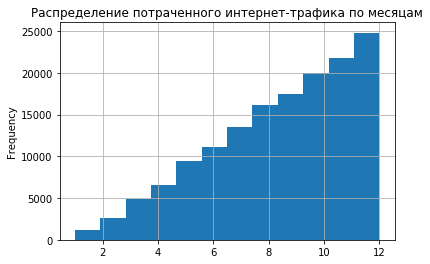

In [46]:
# вывод графика распределения потраченного интернет-трафика по месяцам
(
    internet_df['session_date'].dt.month
    .plot(kind='hist', bins=12, title='Распределение потраченного интернет-трафика по месяцам', grid=True)
);

Также посмотрим на распределение суммарного количества потраченного интернет-трафика по месяцам. Для этого добавим к таблице новый столбец `month_session` с номером месяца, в котором была открыта сессия.

In [47]:
# добавление колонки month_session с номером месяца, в котором состоялась интернет-сессия, к исходной таблице
internet_df['month_session'] = internet_df['session_date'].dt.month

После добавления можно построить график распределения суммарного количества израсходованного трафика интернет-сессий по месяцам.

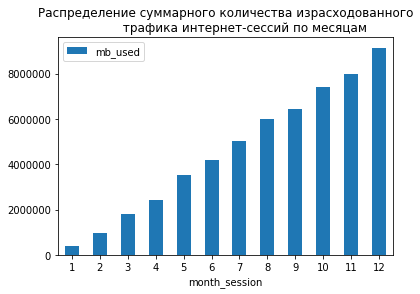

In [48]:
# вывод графика распределения суммарного количества израсходованного трафика интернет-сессий по месяцам
(
    internet_df.groupby('month_session')
    .agg({'mb_used':'sum'})
    .reset_index()[['month_session', 'mb_used']]
    .plot(kind='bar', x='month_session', y='mb_used', rot=360,
          title="""Распределение суммарного количества израсходованного
          трафика интернет-сессий по месяцам""")
);

Определим общее количество интернет-сессий с нулевым значением израсходованного интернет-трафика.

In [49]:
print('Количество интернет-сессий с нулевым значением израсходованного интернет-трафика:',\
      internet_df[internet_df['mb_used'] == 0].shape[0])

Количество интернет-сессий с нулевым значением израсходованного интернет-трафика: 19598


Построим график распределения израсходованного интернет-трафика.

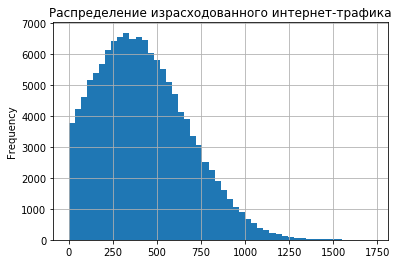

In [50]:
# вывод графика распределения израсходованного интернет-трафика
(
    internet_df[internet_df['mb_used'] !=0]['mb_used']
    .plot(kind='hist', bins=50, grid=True, title='Распределение израсходованного интернет-трафика')
);

Преобразуем столбец с объёмом потраченного за сессию интернет-трафика `mb_used` путём округления в большую сторону и преобразованием данных к целочисленному типу.

In [51]:
# округление данных с объёмом потраченного интернет-трафика в большую сторону и приведение их к целочисленному типу
internet_df['mb_used'] = internet_df['mb_used'].apply(np.ceil).astype('int64')

В завершении предобработки данных таблицы `internet_df` посмотрим на основные описательные статистики.

In [52]:
# вызов метода describe для просмотра описательных статистик данных в таблице internet_df
internet_df.describe()

,internet_session_id,mb_used,user_id,month_session
count,149396.000000,149396.000000,149396.000000,149396.000000
mean,205.811856,370.622098,1252.099842,8.563315
std,157.267497,278.387019,144.050823,2.788717
min,0.000000,0.000000,1000.000000,1.000000
25%,78.000000,139.000000,1130.000000,7.000000
50%,172.000000,349.000000,1251.000000,9.000000
75%,302.000000,560.000000,1380.000000,11.000000
max,833.000000,1725.000000,1499.000000,12.000000


* Данные в таблице `internet_df` с информацией об интернет-сессиях представлены за период полного календарного `2018` года.
* Количество потраченного интернет трафика по месяцам, а также суммарное количество израсходованного трафика растёт линейно на протяжении всего наблюдаемого периода. Расхождений нет.
* Распределение израсходованного интернет-трафика близко к распределению Пуассона. Данные скошены вправо. Среднее значение `370` немного больше медианного, равного `348`.
* Аномальных и/или ошибочных значений в данных не обнаружено.

### Предобработка данных о сообщениях (messages_df)

В таблице `messages_df` дату отправки сообщений `message_date` приведём к типу `datetime`, чтобы иметь возможность в дальнейшем использовать встроенные в *pandas* методы для работы с датами.

In [53]:
# преобразование типа данных в столбце message_date таблицы messages_df к типу данных datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')

Обработаем записи в столбце `id`, отбросив в записях всё, что находится до нижнего подчёркивания, включая его самого.

In [54]:
# обработка строк в столбце id с помощью вспомогательной функции string_id_mod
messages_df['id'] = messages_df.apply(string_id_mod, axis=1)

# переименование столбца id в calls_id
messages_df = messages_df.rename(columns={'id': 'message_id'})

# преобразование типа данных в столбце calls_id к целочисленному типу
messages_df['message_id'] = messages_df['message_id'].astype('int64')

Проверим за какой период представлены данные в таблице `message_df`.

In [55]:
# просмотр минимального и максимального значений даты в таблице message_df
messages_df['message_date'].min(), messages_df['message_date'].max()

(Timestamp('2018-01-02 00:00:00'), Timestamp('2018-12-31 00:00:00'))

Данные в таблице `messages_df` также представлены за календарный год с `1 января 2018 года` по `31 декабря 2018 года`. С учётом этого, логичным шагом будет визуализация распределения количества сообщений по месяцам.

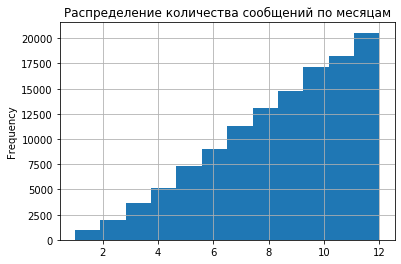

In [56]:
# вывод графика распределения количества сообщений по месяцам
(
    messages_df['message_date'].dt.month
    .plot(kind='hist', bins=12, title='Распределение количества сообщений по месяцам', grid=True)
);

В завершении предобработки данных таблицы `messages_df` посмотрим на основные описательные статистики.

In [57]:
# вызов метода describe для просмотра описательных статистик данных в таблице messages_df
messages_df.describe()

,message_id,user_id
count,123036.000000,123036.000000
mean,267.595281,1256.989410
std,248.577464,143.523967
min,0.000000,1000.000000
25%,81.000000,1134.000000
50%,195.000000,1271.000000
75%,379.000000,1381.000000
max,1462.000000,1499.000000


* Данные в таблице `messages_df` с информацией о сообщениях представлены за период полного календарного `2018` года.
* Количество отправленных сообщений по месяцам растёт линейно на протяжении всего наблюдаемого периода.
* Аномальных и/или ошибочных значений в данных не обнаружено.

### Предобработка данных о пользователях (users_df)

В таблице `users_df` дату подключения тарифа `reg_date` и дату прекращения пользования тарифом `churn_date` приведём к типу `datetime`, чтобы иметь возможность в дальнейшем использовать встроенные в *pandas* методы для работы с датами.

In [58]:
# преобразование типа данных в столбце reg_date таблицы users_df к типу данных datetime
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')

# преобразование типа данных в столбце churn_date таблицы users_df к типу данных datetime
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')

Замена строковых значений `smart` и `ultra` по столбцу `tariff` на `0` и `1`, в соотвествии с индексами тарифов из таблицы `tariffs_df`.

In [59]:
# замена значений с помощью метода map()
users_df['tariff'] = users_df['tariff'].map({'smart': 0, 'ultra': 1})

Проверим как пользователи распределены по различным городам. Для этого построим круговую диаграмму распределения пользователей по городам, взяв 20 первых значений из отсортированного в порядке убывания списка.

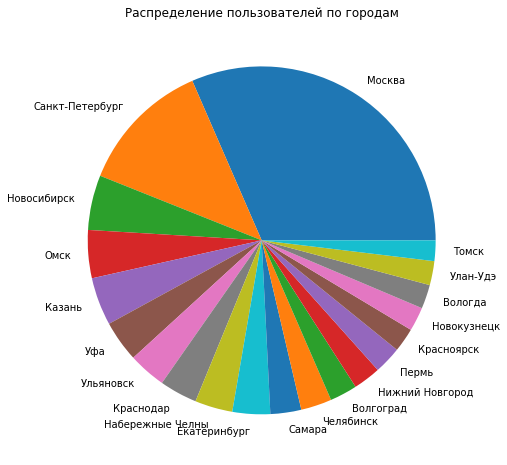

In [60]:
# визуализация первые 20 записей о распредлении пользователей по городам, отсортированных по убыванию
users_df['city'].value_counts().head(20).plot(
    kind='pie',
    figsize=(8, 8),
    label='',
    title='Распределение пользователей по городам'
);

Проверим за какой период представлены данные в таблице `users_df`.

In [61]:
# просмотр минимального и максимального значений даты в таблице users_df
users_df['reg_date'].min(), users_df['reg_date'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00'))

Данные в таблице `users_df` представлены за календарный год с `1 января 2018 года` по `31 декабря 2018 года`. С учётом этого, посмотрим на распределение количества подключений тарифов по месяцам.

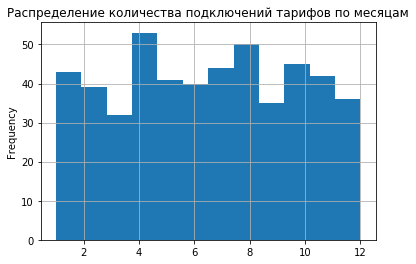

In [62]:
# вывод графика распределения количества подключений тарифов по месяцам
(
    users_df['reg_date'].dt.month
    .plot(kind='hist', bins=12, title='Распределение количества подключений тарифов по месяцам', grid=True)
);

В завершении предобработки данных таблицы `users_df` посмотрим на основные описательные статистики.

In [63]:
# вызов метода describe для просмотра описательных статистик данных в таблице users_df
users_df.describe()

,user_id,age,tariff
count,500.000000,500.00000,500.000000
mean,1249.500000,46.58800,0.298000
std,144.481833,16.66763,0.457838
min,1000.000000,18.00000,0.000000
25%,1124.750000,32.00000,0.000000
50%,1249.500000,46.00000,0.000000
75%,1374.250000,62.00000,1.000000
max,1499.000000,75.00000,1.000000


* Данные в таблице `users_df` с информацией о пользователях представлены за период полного календарного `2018` года.
* Количество подключений пользователей к тарифам в помесячном разрезе наблюдаемого периода остаётся постоянным с некоторыми отклонениями от среднего значения.
* Наибольшее количество пользователей находится в Москве, Санкт-Петербурге и Новосибирске, что согласуется с численностью населения в данных городах.
* Аномальных и/или ошибочных значений в данных не обнаружено.

### Дополнительные расчёты и добавление данных

Для анализа данных и статистической проверки гипотез необходимы дополнительные параметры для тарифных планов, такие как:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объём израсходованного интернет-трафика по месяцам;
* помесячная выручка с каждого пользователя.

Для расчёта помесячной выручки с каждого пользователя необходимо из суммарного количества звонков, сообщений и интернет-трафика вычесть бесплатный лимит, далее полученный остаток умножить на значение из соответствующего тарифного плана и прибавить абонентскую плату, по тарифному плану.

#### Количество совершённых звонков и израсходованных минут разговора по месяцам

На основе датафрейма `calls_df` создадим новую сводную таблицу с количеством звонков по месяцам `calls_by_month`.

In [64]:
# формирование сводной таблицы по количеству звонков по месяцам
calls_by_month = calls_df.pivot_table(
    index=['user_id'],
    columns='month_call',
    values='calls_id',
    aggfunc='count')

# просмотр первых строк полученной таблицы
display(calls_by_month.head(5))

month_call,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
1002,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0
1004,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0


Также на основе датафрейма `calls_df` создадим новую сводную таблицу с количеством израсходованных минут по месяцам `minutes_by_month`.

In [65]:
# формирование сводной таблицы по продолжительности звонков по месяцам
minutes_by_month = calls_df.pivot_table(
    index=['user_id'],
    columns='month_call',
    values='duration',
    aggfunc='sum')

# просмотр первых строк полученной таблицы
display(minutes_by_month.head(5))

month_call,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0


#### Объём израсходованного интернет-трафика по месяцам

На основе датафрейма `internet_df` создадим новую сводную таблицу с объёмом потраченного трафика по месяцам `mb_by_month`.

In [66]:
# формирование сводной таблицы по объёму потраченного трафика по месяцам
mb_by_month = internet_df.pivot_table(
    index=['user_id'],
    columns='month_session',
    values='mb_used',
    aggfunc='sum')

# просмотр первых строк полученной таблицы
display(mb_by_month.head(5))

month_session,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,2256.0,23257.0,14016.0,14070.0,14581.0,14717.0,14768.0,9827.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18452.0,14053.0
1002,NaN,NaN,NaN,NaN,NaN,10871.0,17601.0,20347.0,16712.0,13905.0,18610.0,18137.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8571.0,12479.0,14779.0,11368.0,10132.0
1004,NaN,NaN,NaN,NaN,13415.0,17619.0,22243.0,28607.0,15125.0,18494.0,15631.0,18038.0


#### Количество отправленных сообщений по месяцам

Перед созданием сводной таблицы необходимо к датафрейму `messages_df` добавить новый столбец `month_message` с номером месяца, в котором было отправлено сообщение.

In [67]:
# добавление колонки month_message с номером месяца, в котором было отправлено сообщение, к исходной таблице messages_df
messages_df['month_message'] = messages_df['message_date'].dt.month

На основе датафрейма `messages_df` создадим новую сводную таблицу с количеством отправленных пользователями сообщений с разбивкой по месяцам `mb_by_month`.

In [68]:
# формирование сводной таблицы по количеству отправленных сообщений по месяцам
messages_by_month = messages_df.pivot_table(
    index=['user_id'],
    columns='month_message',
    values='message_id',
    aggfunc='count')

# просмотр первых строк полученной таблицы
display(messages_by_month.head(5))

month_message,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0


#### Выручка от пользователей по месяцам

Рассчитаем помесячную выручку с каждого пользователя. Для удобства расчётов сведём все данные в таблицу `profit`, строки которой будут содержать данные о количестве минут разговора, объёме израсходованного интернет-трафика, количестве отправленных сообщений по каждому клиенту. Кроме того, в строках будет также содержаться такая информация о текущем пользовательском тарифе как лимиты на суммарное количество звонков, сообщений и интернет-трафика, стоимость данных услуг сверх установленных лимитов, а также абонентская плата по тарифу.

In [69]:
# произведём агрегацию длительности звонков пользователей по месяцам с помощью методов groupby() и agg()
calls_month = (
    calls_df.groupby(['user_id', 'month_call'], as_index=False)
    .agg({'duration': 'sum'})
    .rename(columns={'month_call': 'month', 'duration': 'calls_sum'})
)

# проверим размер получившейся таблицы и количество уникальных пользователей в ней, 
# и максимально допустимое количество строк в таблице
calls_month.shape[0], calls_month['user_id'].nunique(), calls_month['user_id'].nunique() * 12

(3174, 492, 5904)

Полученные данные выглядят правдоподобно и не превышают максимально допустимый размер в `5904` строки, который может быть определён как произведение количества уникальных пользователей, равное `492` на количество месяцев анализируемого периода, равное `12`.

In [70]:
# произведём агрегацию количества сообщений пользователей по месяцам с помощью методов groupby() и agg()
messages_month = (
    messages_df.groupby(['user_id', 'month_message'], as_index=False)
    .agg({'message_id': 'count'})
    .rename(columns={'month_message': 'month', 'message_id': 'messages_sum'})
)

# проверим размер получившейся таблицы и количество уникальных пользователей в ней, 
# и максимально допустимое количество строк в таблице
messages_month.shape[0], messages_month['user_id'].nunique(), messages_month['user_id'].nunique() * 12

(2717, 426, 5112)

Полученные данные выглядят правдоподобно и не превышают максимально допустимый размер в `5112` строк, который может быть определён как произведение количества уникальных пользователей, равное `426` на количество месяцев анализируемого периода, равное `12`.

In [71]:
# произведём агрегацию объёма израсходованного пользователями трафика по месяцам с помощью методов groupby() и agg()
internet_month = (
    internet_df.groupby(['user_id', 'month_session'], as_index=False)
    .agg({'mb_used': 'sum'})
    .rename(columns={'month_session': 'month', 'mb_used': 'traffic_sum'})
)

# проверим размер получившейся таблицы и количество уникальных пользователей в ней, 
# и максимально допустимое количество строк в таблице
internet_month.shape[0], internet_month['user_id'].nunique(), internet_month['user_id'].nunique() * 12

(3203, 497, 5964)

Полученные данные выглядят правдоподобно и не превышают максимально допустимый размер в `5964` строки, который может быть определён как произведение количества уникальных пользователей, равное `497` на количество месяцев анализируемого периода, равное `12`.

Используя полученные промежуточные таблицы `calls_month`, `messages_month` и `internet_month`, объединим их между собой по значениям идентификатора пользователя `user_id` и месяца `month`. К полученному результату присоединим также данные из датафрейма `users_df`, касающиеся тарифа пользователя `tariff` и его города `city`.

Для таблиц `calls_month`, `messages_month` и `internet_month` используем внешний тип слияния `outer`, при котором в итоговую таблицу попадают все данные, которые присутствуют хотя бы в одном из датафреймов.

Для присоединения к полученному результату данных из датафрейма `users_df` с данными о пользователях, используем тип слияния `left`, при котором в итоговый датафрейм обязательно будут включены все строки из левого датафрейма.

In [72]:
# объединим полученные на предыдущих шагах таблицы calls_month, messages_month и internet_month по пльзователям и 
# месяцам в итоговую таблицу profit
profit = calls_month.merge(messages_month, on=['user_id','month'], how='outer')\
.merge(internet_month, on=['user_id','month'], how='outer')\
.merge(users_df[['user_id', 'tariff', 'city']], on='user_id', how='left')\

In [73]:
# проверка размера полученной таблицы
display(profit.shape)

(3214, 7)

In [74]:
# добавим к датафрейму tariffs_df столбец tariff с числовым идентификатором тарифа для последующего объединения
# по его значению
tariffs_df['tariff'] = tariffs_df['tariff_name']
tariffs_df['tariff'] = tariffs_df['tariff'].map({'smart': 0, 'ultra': 1})

К сводной таблице добавим из датафрейма `tariffs_df` такие данные о тарифах как:
* `messages_included` - количество сообщений в месяц, включённых в абонентскую плату;
* `mb_per_month_included` - объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
* `minutes_included` - количество минут разговора в месяц, включённых в абонентскую плату;
* `rub_monthly_fee` - ежемесячная абонентская плата в рублях;
* `rub_per_gb` - стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета;
* `rub_per_message` - стоимость отправки сообщения сверх тарифного пакета;
* `rub_per_minute` - стоимость минуты разговора сверх тарифного пакета.

Они потребуются для дальнейших расчётов. Для присоединения к полученному результату данных из датафрейма `tariffs_df` с информацией о тарифах, используем тип слияния `left`, при котором в итоговый датафрейм обязательно будут включены все строки из левого датафрейма, то есть из `profit`.

In [75]:
# список столбцов для объединения
tariffs_columns = ['messages_included',
                  'mb_per_month_included',
                  'minutes_included',
                  'rub_monthly_fee',
                  'rub_per_gb',
                  'rub_per_message',
                  'rub_per_minute',
                  'tariff',
                  'tariff_name']

# объединение сводной таблицы profit с данными по тарифу из датафрейма tariffs_df
profit = profit.merge(tariffs_df[tariffs_columns], on = 'tariff', how = 'left')

In [76]:
# просмотр полученного результата
display(profit.head(10))

,user_id,month,calls_sum,messages_sum,traffic_sum,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.0,22.0,2256.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.0,60.0,23257.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.0,75.0,14016.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.0,81.0,14070.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.0,57.0,14581.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
5,1000,10,350.0,73.0,14717.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
6,1000,11,338.0,58.0,14768.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
7,1000,12,333.0,70.0,9827.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
8,1001,11,430.0,NaN,18452.0,0,Москва,50,15360,500,550,200,3,3,smart
9,1001,12,414.0,NaN,14053.0,0,Москва,50,15360,500,550,200,3,3,smart


In [77]:
# проверка размера полученной таблицы
display(profit.shape)

(3214, 15)

Общее количество строк в самой большой таблице до объединения составляло `3203`. В свобной таблице получилось `3214` записей, то есть на `11` строк больше. Подобный результат допустим для внешнего объединения и говорит о том, что объединение произошло по внешним областям, которые могли иметь некоторые отличия в датафреймах.

Главное, что значение количества строк в сводном датафрейме не меньше количества строк в самой большой таблице, участвующей в объединении, что означает то, что объединение проведено корректно, потерь данных нет.

Приведём к целочисленному типу данные с ежемесячным количеством израсходованных минут `calls_sum`, отправленных сообщений `messages_sum` и объёмом потраченного интернет-трафика `traffic_sum`. Пропущенные значения перед этим заполним `0`, что будет означать что в данном месяце для данного клиента не было оказано соотвествующих услуг.

In [78]:
# заполнение пропущенных значений нолями
profit.loc[profit['calls_sum'].isna(), 'calls_sum'] = 0
profit.loc[profit['messages_sum'].isna(), 'messages_sum'] = 0
profit.loc[profit['traffic_sum'].isna(), 'traffic_sum'] = 0

# преобразование данных к целочисленному типу
profit['calls_sum'] = profit['calls_sum'].astype('int64')
profit['messages_sum'] = profit['messages_sum'].astype('int64')
profit['traffic_sum'] = profit['traffic_sum'].astype('int64')

Для расчёта помесячной выручки с каждого пользователя создадим вспомогательную функцию *find_profit()*. Затем применим её к каждой строке таблицы `profit` с помощью метода *apply()* и занесём полученный результат в новый столбец `profit`.

In [79]:
def find_profit(row):
    """
    input: row - строка из датафрейма
    ouput: (profit) - рассчитанное значение помесячной выручки для каждого пользователя
    
    Описание функции:
    - из суммарных значений количества звонков, сообщений и трафика вычитаются бесплатные лимиты;
    - если остаток после предыдущего шага больше ноля, то он умножается на соотвествующее значение из тарифного плана 
      и суммируется;
    - к сумме, полученной на предыдущем шаге, добавляется значение абонентской платы, соотвествующее тарифу.
    """
    profit = row['rub_monthly_fee']
    
    # добавим к абонентской плате выручку от превышения лимитов по времени разговоров
    if row['calls_sum'] > row['minutes_included']:
        profit += (row['calls_sum'] - row['minutes_included']) * row['rub_per_minute']
    
    # добавим к выручке доход от превышения лимитов по отправленным сообщениям
    if row['messages_sum'] > row['messages_included']:
        profit += (row['messages_sum'] - row['messages_included']) * row['rub_per_message']
    
    # добавим к выручке доход от превышения лимитов по израсходованному объёму интернет-трафика
    if row['traffic_sum'] > row['mb_per_month_included']:
        profit += math.ceil((row['traffic_sum'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb']
        
    return profit

In [80]:
# применим функцию find_profit() к таблице profit
profit['profit'] = profit.apply(find_profit, axis=1)

Также для анализа может оказаться полезным значение переплаты пользователей за услуги сверх установленных лимитов. Для расчёта возможной переплаты каждого пользователя создадим вспомогательную функцию *find_overpayment()*. Затем применим её к каждой строке таблицы `profit` с помощью метода *apply()* и занесём полученный результат в новый столбец `overpay`.

In [81]:
def find_overpayment(row):
    """
    input: row - строка из датафрейма
    ouput: (overpay) - рассчитанное значение возможной переплаты для каждого пользователя
    
    Описание функции:
    - возвращает величину переплаты пользователя как разницу между выручкой и тарифом
    """
    fee = row['rub_monthly_fee']
    pay = row['profit']
    
    # расчёт значения переплаты
    if pay > fee:
        return pay - fee
    else:
        return 0

In [82]:
# применим функцию find_overpayment() к таблице profit
profit['overpay'] = profit.apply(find_overpayment, axis=1)

Так как предполагается анализ относительных значений переплат, то добавим также в таблицу `profit` новый столбец `overpay_ratio` как долю переплат по отношению к ежемесячной тарифной плате.

In [83]:
# добавление значений по доле переплат к таблице profit
profit['overpay_ratio'] = profit['overpay'] / profit['rub_monthly_fee']

In [84]:
# проверка полученного результата
display(profit.head(10))

,user_id,month,calls_sum,messages_sum,traffic_sum,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,profit,overpay,overpay_ratio
0,1000,5,159,22,2256,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950,0,0.000000
1,1000,6,172,60,23257,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950,0,0.000000
2,1000,7,340,75,14016,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950,0,0.000000
3,1000,8,408,81,14070,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950,0,0.000000
4,1000,9,466,57,14581,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950,0,0.000000
5,1000,10,350,73,14717,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950,0,0.000000
6,1000,11,338,58,14768,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950,0,0.000000
7,1000,12,333,70,9827,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950,0,0.000000
8,1001,11,430,0,18452,0,Москва,50,15360,500,550,200,3,3,smart,1350,800,1.454545
9,1001,12,414,0,14053,0,Москва,50,15360,500,550,200,3,3,smart,550,0,0.000000


Данные о помесячной выручке, переплатах и доле переплат относительно месячных тарифов для каждого пользователя успешно добавлены в таблицу `profit`.

### Выводы по предобработке данных

* Все данные, относящиеся к различным датам, были преобразованы к типу данных `datetime`.
* Как и заявлено в описании к данным, они соотвествуют периоду полного календарного `2018` года.
* Количество совершаемых звонков и отправляемых сообщений, а также объём расходуемого пользователями интернет-трафика, растут линейно от месяца к месяцу в наблюдаемом временном промежутке, что может говорить о стабильном развитии компании Мегалайн и росте лояльности у её клиентов.
* Распределения по продолжительности звонков и израсходованному интернет-трафику близки к распределению Пуассона. Данные скошены вправо.
* Почти половину пользователей Мегалайна составляют жители трёх крупнейших городов: Москвы, Санкт-Петербурга и Новосибирска.
* Для последующих статистических проверок гипотез произведены дополнительные расчёты и добавлены такие данные как: количество совершённых звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объём израсходованного интернет-трафика по месяцам и помесячная выручка с каждого пользователя.

## Анализ данных

### Анализ количества минут разговоров

Для анализа данных и расчёта статистических показателей по исследуемым тарифам создадим вспомогательную функцию `get_stats`.

In [85]:
# функция для расчёта статистических характеристик
def get_stats(column, tariff):
    """
    input:    column - параметр (столбец) из датафрейма profit, для которого рассчитываются статистические параметры
              tariff - тарифный план, для которого производятся расчёты
    ouput:    (profit) - рассчитанное значение помесячной выручки для каждого пользователя
    
    Описание функции:
    - функция выполняет срез из датафрейма profit по заданному тарифу tariff;
    - рассчитывает средние месячные значения по параметру column по каждому пользователю;
    - выводит статистические показатели по срезу (среднее, дисперсию и стандартное отклонение).
    """    
    # получим из датафрейма profit статистические данные по column для пользователей тарифа tariff
    # полученные данные сгруппируем по user_id и вычислим среднее значение column по имеющимся данным
    stat = (
        profit.loc[(profit['tariff_name'] == tariff) & (profit[column] > 0)]
        .groupby('user_id')[column]
        .agg('mean')
    )
    
    print(f'Тариф -- "{tariff.upper()}" --')
    # подсчёт среднего значения и его вывод
    print(f'Среднее значение: {round(stat.mean(), 0)}')
    # подсчёт значения дисперсии и её вывод
    print(f'Дисперсия: {round(np.var(stat), 0)}')
    # подсчёт стандартного отклонения как квадратного корня из дисперсии
    print(f'Стандартное отклонение: {round(np.sqrt(np.var(stat)), 0)}')
    return stat

In [86]:
# просмотр статистических характеристик для анализа минут разговоров для тарифа smart
minutes_smart = get_stats('calls_sum', 'smart')

Тариф -- "SMART" --
Среднее значение: 421.0
Дисперсия: 20519.0
Стандартное отклонение: 143.0


In [87]:
# просмотр статистических характеристик для анализа минут разговоров для тарифа ultra
minutes_ultra = get_stats('calls_sum', 'ultra')

Тариф -- "ULTRA" --
Среднее значение: 547.0
Дисперсия: 71369.0
Стандартное отклонение: 267.0


Чтобы избежать дублирования кода и иметь возможность сопоставления различных параметров сравниваемых тарифных планов, создадим вспомогательную функцию, которая построит две гистограммы (для тарифов `smart` и `ultra`) в единой системе координат.

In [88]:
# функция для отрисовки двойных гистограмм по тарифам smart и ultra для исследуемого параметра
def show_double_hist(smart, ultra, axis_name, bins_count, range_values, smart_lim = 0, ultra_lim = 0):
    """
    input: smart (pandas.Series) - срез данных по тарифу smart с усреднёнными значениями исследуемого параметра
           ultra (pandas.Series) - срез данных по тарифу ultra с усреднёнными значениями исследуемого параметра
           axis_name (str) - название исследуемого параметра
           bins_count (int) - количество корзин в гистограмме
           range_values (tuple) - пределы значений исследуемого параметра для построения гистограмм
           smart_lim (int) - лимит по исследуемому параметру для тарифа smart
           ultra_lim (int) - лимит по исследуемому параметру для тарифа ultra
    ouput: None
    Функция отрисовывает парную гистограмму срезов для тарифов smart и ultra для исследуемого параметра 
    в единой системе координат.
    """
    
    # параметры графика для тарифа smart
    ax = smart.plot(
        kind = 'hist',
        bins = bins_count,
        range = range_values,
        linewidth = 3,
        density = True,
        alpha = 0.7,
        figsize=(9, 6),
        grid = True,
        title = 'Плотность распределения',
        legend = True,
        label = 'smart'
        )
    
    # параметры графика для тарифа ultra
    ultra.plot(
        kind = 'hist',
        ax = ax,
        range = range_values,
        bins = bins_count,
        linewidth = 3,        
        density = True,
        alpha = 0.7,
        figsize=(9, 6),
        grid = True,
        legend = True,
        label = 'ultra',
        )
    
    # создание заголовка для графика и подписей к осям
    ax.set_title(axis_name + '. Плотность распределения', fontsize=14)
    ax.set_xlabel(axis_name + '. Среднее месячное значение', fontsize=12)
    ax.set_ylabel('Плотность распределения', fontsize=12)
    
    # границы предоплаченных периодов для исследуемого параметра
    if smart_lim:
        plt.axvline(x = smart_lim, color = 'steelblue', linestyle = '--')
    if ultra_lim:
        plt.axvline(x = ultra_lim, color = 'peru', linestyle = '--')
    plt.show();

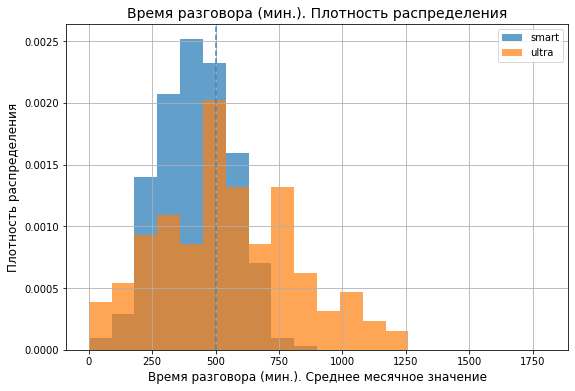

In [89]:
# построение гистограммы распределении минут разговоров для тарифных планов с помощью функции show_double_hist()
show_double_hist(minutes_smart,
                 minutes_ultra,
                 'Время разговора (мин.)',
                 bins_count=20,
                 range_values=(0, 1800),
                 smart_lim = 500
                )

* Пользователи тарифа *smart* тратят в среднем на разговоры `421` минуту, а тарифа *ultra* - `547` минут.
* Стандартное отклонение по времени разговора для тарифа *smart* составило `143`, а для тарифа *ultra* - `267`, что говорит о том, что для тарифа *smart* значения более плотно сгруппированы вокруг среднего значения, или по-другому разброс значений для тарифа *ultra* больше, чем для тарифа *smart*.
* На гистограммах наблюдается большее смещение вправо средней продолжительности звонков на тарифе *ultra*. Гистограммы, в целом, отображают распределение близкое к нормальному с некоторым смещением вправо для графика тарифного плана *ultra*.
* После достижения лимита на продолжительность разговоров в `500` минут по тарифному плану *smart* наблюдается заметное снижение количества общей продолжительности разговоров. Из этого можно сделать вывод, что пользователи стараются не превышать предоплаченный лимит по тарифному плану. У пользователей тарифного плана *ultra* включённый в абонентскую плату лимит на продолжительность разговоров существенно выше, составляет `3000` минут и по графикам можно отметить, что хотя пользователи данного тарифа и пользуются его расширенными возможностями, подавляющему их большинству не грозит перерасход по данному показателю.

### Анализ потраченного интернет-трафика

Аналогичный анализ проведём для объёма израсходованного пользователями тарифных планов интернет-трафика.

In [90]:
# просмотр статистических характеристик для анализа израсходованного интернет-трафика для тарифа smart
internet_smart = get_stats('traffic_sum', 'smart')

Тариф -- "SMART" --
Среднее значение: 16237.0
Дисперсия: 13118523.0
Стандартное отклонение: 3622.0


In [91]:
# просмотр статистических характеристик для анализа израсходованного интернет-трафика для тарифа ultra
internet_ultra = get_stats('traffic_sum', 'ultra')

Тариф -- "ULTRA" --
Среднее значение: 19762.0
Дисперсия: 66414724.0
Стандартное отклонение: 8150.0


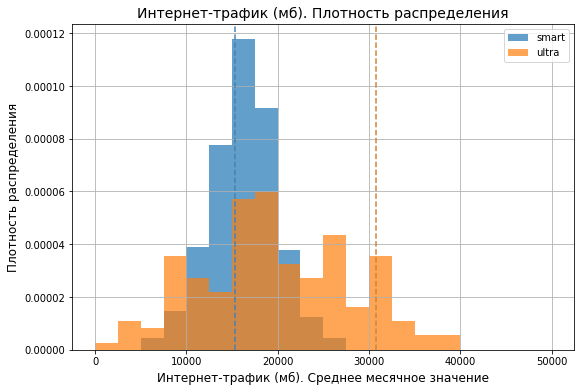

In [92]:
# построение гистограммы распределении минут объёма израсходованного интернет-трафика для тарифных планов
# с помощью функции show_double_hist()
show_double_hist(internet_smart,
                 internet_ultra,
                 'Интернет-трафик (мб)',
                 bins_count=20,
                 range_values=(0, 50000),
                 smart_lim = 15360,
                 ultra_lim = 30720
                )

* Пользователи тарифа *smart* тратят в среднем `16237` мегабайт интернет-трафика, а тарифа *ultra* - `19762` мегабайт.
* Стандартное отклонение по объёму израсходованного интерент-трафика для тарифа *smart* составило `3622`, а для тарифа *ultra* - `8150`, что говорит о том, что для тарифа *smart* значения более плотно сгруппированы вокруг среднего значения, или по-другому разброс значений для тарифа *ultra* больше, чем для тарифа *smart*.
* На гистограмме наблюдается практически идеально симметричное относительно среднего значения нормальное распределение для тарифа *smart*. Для тарифа *ultra* наблюдается несколько большее смещение вправо.
* С объёмом расходуемого интернет-трафика картина несколько иная. Здесь уже пользователи тарифного плаана *smart* более охотно идут или вынуждены идти на превышение предоплаченного лимита в `15` гигабайт (`15360` мегабайт), в отличие от пользователей тарифного плана *ultra* для которого наблюдается резкое сокращение расходуемого интернет-трафика после достижения лимита в 30 гигабайт (`30720` мегабайт).

### Анализ количества отправленных сообщений

Ещё одним параметром для анализа является количество отправленных пользователями тарифов `smart` и `ultra` сообщений.

In [93]:
# просмотр статистических характеристик по количеству отправленных сообщений для тарифа smart
messages_smart = get_stats('messages_sum', 'smart')

Тариф -- "SMART" --
Среднее значение: 38.0
Дисперсия: 615.0
Стандартное отклонение: 25.0


In [94]:
# просмотр статистических характеристик по количеству отправленных сообщений для тарифа ultra
messages_ultra = get_stats('messages_sum', 'ultra')

Тариф -- "ULTRA" --
Среднее значение: 65.0
Дисперсия: 1868.0
Стандартное отклонение: 43.0


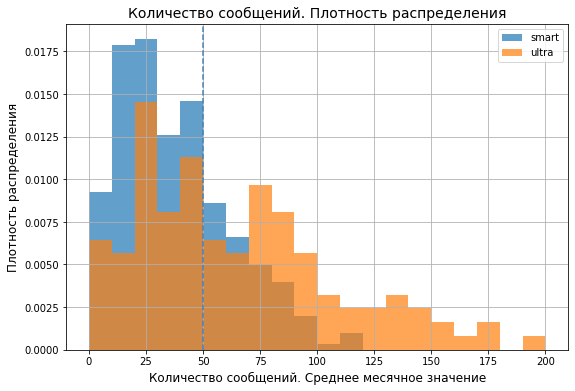

In [95]:
# построение гистограммы распределении по количеству отправленных сообщений с помощью функции show_double_hist()
show_double_hist(messages_smart,
                 messages_ultra,
                 'Количество сообщений',
                 bins_count=20,
                 range_values=(0, 200),
                 smart_lim = 50,
                )

* Пользователи тарифа *smart* отправляют в среднем `38` сообщений, а тарифа *ultra* - `67` сообщений.
* Стандартное отклонение по объёму израсходованного интерент-трафика для тарифа *smart* составило `26` единиц, а для тарифа *ultra* - `44`, что говорит о том, что для тарифа *smart* значения более плотно сгруппированы вокруг среднего значения, или по-другому разброс значений для тарифа *ultra* больше, чем для тарифа *smart*.
* На гистограммах можно отметить более выраженное смещение вправо для тарифа *ultra* относительно тарифа *smart*. Форма гистограмм напоминают распределение Пуассона. Отдельные пики и общее отсуствие сглажености могут быть объяснены малым количеством исследуемых данных (всего 500 пользователей на оба тарифных плана).
* После достижения лимита на количество сообщений в `50` единиц по тарифному плану *smart* наблюдается резкое снижение количества сообщений из чего можно сделать вывод, что пользователи стараются не превышать предоплаченный лимит по тарифному плану. Пользователи же тарифного плана *ultra* в своем большинстве не расходуют и пятой части лимита на сообщения, равного `1000` единиц.

### Анализ выручки от пользователей

Проведём анализ выручки от пользователей оператора связи по тарифам `smart` и `ultra`.

In [96]:
# просмотр статистических характеристик по выручке от пользователей для тарифа smart
profit_smart = get_stats('profit', 'smart')

Тариф -- "SMART" --
Среднее значение: 1330.0
Дисперсия: 367217.0
Стандартное отклонение: 606.0


In [97]:
# просмотр статистических характеристик по выручке от пользователей для тарифа ultra
profit_ultra = get_stats('profit', 'ultra')

Тариф -- "ULTRA" --
Среднее значение: 2087.0
Дисперсия: 89898.0
Стандартное отклонение: 300.0


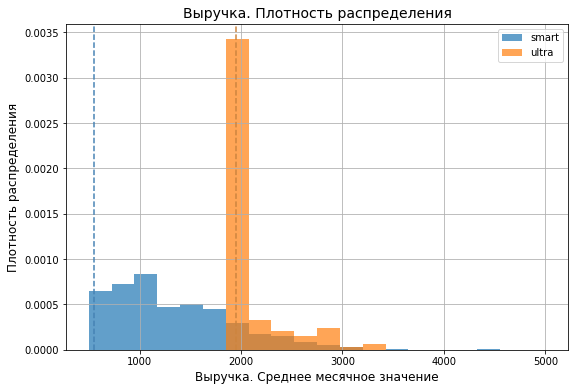

In [98]:
# построение гистограммы распределении по выручке от пользователей с помощью функции show_double_hist()
show_double_hist(profit_smart,
                 profit_ultra,
                 'Выручка',
                 bins_count=20,
                 range_values=(500, 5000),
                 smart_lim = 550,
                 ultra_lim = 1950
                )

Посмотрим как именяется выручка от пользователей по месяцам на протяжении исследуемого периода. Для этого построим линейный график зависимости выручки по месяцам для тарифных планов `smart` и `ultra`. Для удобства построения такого графика создадим вспомогательную функцию *show_double_line_chart()*.

In [99]:
# функция для отрисовки парных линейных графиков 
def show_double_line_chart(smart, ultra, y_data, range_value, ylim):
    """
    input: smart (pandas.Series) - исследуемый срез данных по тарифу smart
           ultra (pandas.Series) - исследуемый срез данных по тарифу ultra
           column (str) - название параметра (столбца) по которому будет произведена группировка данных
           range_value (tuple) - пределы значений в столбце column для построения графика
           ylim (tuple) - пределы значений по у оси для построения гистограммы
    ouput: None
    Функция отрисовывает парные линейные графики из для тарифов smart и ultra в единой системе координат по заданному
    параметру.
    """
    # параметры графика для тарифа smart
    ax = (smart.plot(y=f'{y_data}',
                     style='-o',
                     figsize=(8, 5),
                     ylim = ylim,
                     label = 'smart',
                     grid=True
                )
         )
    # параметры графика для тарифа ultra
    (
        ultra.plot(ax = ax,
                   y=f'{y_data}',
                   style='-o',
                   figsize=(8, 5),
                   ylim = ylim,
                   label = 'ultra',
                   grid=True
             )
    )
    
    
    if y_data == 'profit':
        # создание заголовка для графика и подписей к осям
        ax.set_title('График месячной выручки', fontsize=14)
        ax.set_xlabel('Месяцы', fontsize=12)
        ax.set_ylabel('Месячная выручка', fontsize=12)
        
        # уровень ежемесячной платы по тарифу smart
        plt.axhline(y = 550, color = 'C0', linestyle = '--')
        # уровень ежемесячной платы по тарифу ultra
        plt.axhline(y = 1950, color = 'darkorange', linestyle = '--')
    elif y_data == 'overpay_ratio':
        # создание заголовка для графика и подписей к осям
        ax.set_title('Доля переплат пользователей по месяцам', fontsize=14)
        ax.set_xlabel('Месяцы', fontsize=12)
        ax.set_ylabel('Доля переплат', fontsize=12)
    plt.show();

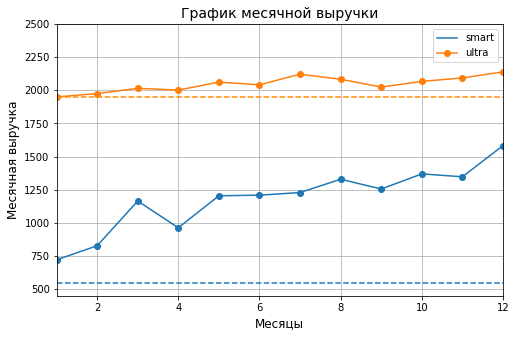

In [100]:
# построение графика помесячной прибыли для тарифов smart и ultra
show_double_line_chart(profit.loc[(profit['tariff_name'] == 'smart') & (profit['profit'] > 0)]
                       .groupby('month')['profit']
                       .agg(profit='mean'),
                       profit.loc[(profit['tariff_name'] == 'ultra') & (profit['profit'] > 0)]
                       .groupby('month')['profit']
                       .agg(profit='mean'),
                       'profit',
                       range_value=(1, 12),
                       ylim=(450, 2500))

Также проанализируем сколько переплачивают пользователи тарифных планов `smart` и `ultra` сверх ежемесячной абонентской платы. Для начала посмотрим на график средних значений доли переплат по месяцам.

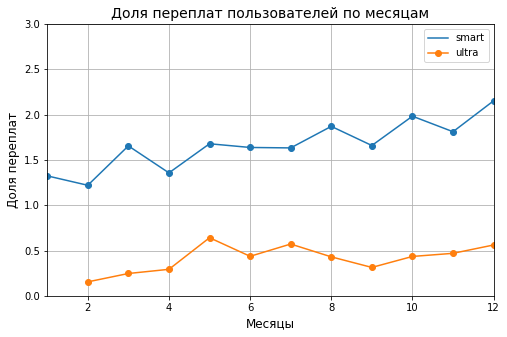

In [101]:
# построение графика средней доли переплат для тарифов smart и ultra
show_double_line_chart(profit.loc[(profit['tariff_name'] == 'smart') & (profit['overpay_ratio'] > 0)]
                       .groupby('month')['overpay_ratio']
                       .agg(overpay_ratio='mean'),
                       profit.loc[(profit['tariff_name'] == 'ultra') & (profit['overpay_ratio'] > 0)]
                       .groupby('month')['overpay_ratio']
                       .agg(overpay_ratio='mean'),
                       'overpay_ratio',
                       range_value=(1, 12),
                       ylim=(0, 3))

Как следует из графика выше, у пользователей тарифного плана `smart`, которым приходится использовать услуги сверх тарифного пакета, значение переплат всегда превышает `100%` рубеж и очень часто `150%`. В то же время пользователи тарифного плана `ultra` редко переплачивают свыше `50%`.

Далее посмотрим на переплаты по тарифам с накопительным эффектом. Для этого вместо агрегирующей функции, вычисляющей среднее значение `mean`, используем агрегирующую фунцию для суммирования значений долей переплат `sum`.

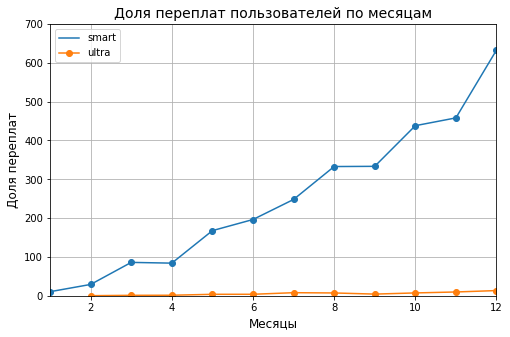

In [102]:
# построение графика доли переплат для тарифов smart и ultra
show_double_line_chart(profit.loc[(profit['tariff_name'] == 'smart') & (profit['overpay_ratio'] > 0)]
                       .groupby('month')['overpay_ratio']
                       .agg(overpay_ratio='sum'),
                       profit.loc[(profit['tariff_name'] == 'ultra') & (profit['overpay_ratio'] > 0)]
                       .groupby('month')['overpay_ratio']
                       .agg(overpay_ratio='sum'),
                       'overpay_ratio',
                       range_value=(1, 12),
                       ylim=(0, 700))

Также для большей наглядности посмотрим на общее количество переплат на сравниваемых тарифных планах. Для этого вместо агрегирующей функции, вычисляющей значение суммы `sum` долей переплат, используем агрегирующую фунцию подсчёта общего количества переплат `count`.

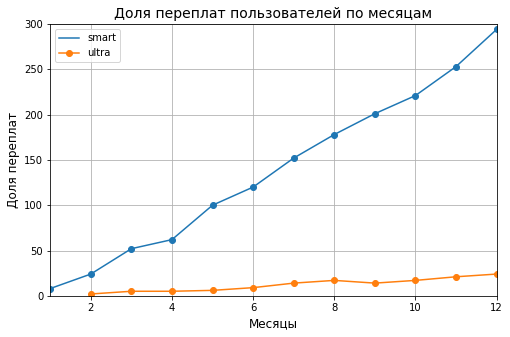

In [103]:
# построение графика доли переплат для тарифов smart и ultra
show_double_line_chart(profit.loc[(profit['tariff_name'] == 'smart') & (profit['overpay_ratio'] > 0)]
                       .groupby('month')['overpay_ratio']
                       .agg(overpay_ratio='count'),
                       profit.loc[(profit['tariff_name'] == 'ultra') & (profit['overpay_ratio'] > 0)]
                       .groupby('month')['overpay_ratio']
                       .agg(overpay_ratio='count'),
                       'overpay_ratio',
                       range_value=(1, 12),
                       ylim=(0, 300))

### Выводы по анализу данных

* По тарифным планам `smart` и `ultra` для значений общей продолжительности разговоров, количества отправленных сообщений и объёма израсходованного интернет-трафика расчитаны статистические характеристики: средние значения, дисперсии и стандартные отклонения.
* По общей продолжительности разговоров, количеству отправленных сообщений и объёму израсходованного интернет-трафика для обоих тарифных планов построены парные гистограммы распределения данных показателей.
* По графикам отпределено, что у пользователей тарифного плана `smart` наблюдается нехватка лимитов по количеству разговоров и отправляемых сообщений, что приводит к нежеланию пользоваться ими далее и платить за превышение. При этом, пользователи данного тарифного плана более охотно идут или вынуждены идти на превышение лимитов по объёму израсходованного интернет-трафика. На тарифном плане `ultra` лимиты по количеству разговоров и отправляемых сообщений значительно выше, абоненты ими активно пользуются и всё равно не приближаются к их исчерпанию, чего не скажешь об объёме расходуемого интернет-трафика. Пользователи тарифного плана `ultra`, как следует из графика, достигают предоплаченного лимита и далее стараются экономить трафик и не переплачивать за интернет сверх тарифного пакета.
* У пользователей тарифного плана `smart`, которым приходится использовать услуги сверх тарифного пакета, значение переплат всегда превышает `100%` рубеж и очень часто `150%`. В то же время пользователи тарифного плана `ultra` редко переплачивают свыше `50%`. Разница в переплатах очень сильно проявляется, если посмотреть на данные с накопительным эффектом. Для тарифного плана `smart` в этом случае наблюдается ежемесячный линейный рост, в то время как на тарифе `ultra` переплаты сохраняют стабильный уровень. Многочисленные переплаты у пользователей тарифного плана `smart` и их стремительный рост могут подорвать лояльность клиентов оператора сотовой связи «Мегалайн».
* Тарифный план `ultra` демонстрирует более высокую прибыльность по графику месячной выручки по сравнению с тарифом `smart`, но необходимо статистическое подтверждение, что данный результат не является случайным.

## Проверка гипотез

### Средняя выручка на тарифах "Смарт" и "Ультра" различаются

Сформулируем нулевую гипотезу H<sub>0</sub>:
* Средняя выручка пользователей тарифа «Смарт» равна средней выручке тарифа «Ультра».

Альтернативная гипотеза H<sub>1</sub>:
* Средняя выручка пользователей тарифов «Смарт» и «Ультра» различается.

Для проверки гипотезы определим пороговое значение уровня значимости `alpha = 0.05`, сформируем соотвествующие выборки и сравним их средние t-тестом с помощью функции `st.ttest_ind`, так как выборки независимы.

In [104]:
# сформируем выборку по выручке от каждого пользователя по тарифу smart
profit_smart = (
    profit.loc[profit['tariff_name'] == 'smart']
    .groupby('user_id')['profit']
    .agg('mean')
)

# сформируем выборку по выручке от каждого пользователя по тарифу ultra
profit_ultra = (
    profit.loc[profit['tariff_name'] == 'ultra']
    .groupby('user_id')['profit']
    .agg('mean')
)

In [105]:
# проверим количество строк в каждой выборке
profit_smart.shape[0], profit_ultra.shape[0]

(350, 148)

Так как выборки разного размера и можно предположить, что дисперсии у них также разные, для функции `st.ttest_ind` укажем параметр `equal_var = False`.

In [106]:
# определение p-уровня значимости для проверки гипотезы
results = st.ttest_ind(profit_smart, profit_ultra, equal_var=False)
print('p-значение: ', results.pvalue)

p-значение:  1.5026228308148506e-58


* Для нулевой гитпотезы о равенстве средней выручки пользователей тарифов «Смарт» и «Ультра» получено p-значение гораздо меньшее уровня значимости `alpha = 0.05` и практически равное 0. Исходя из этого, отвергаем нулевую гипотезу в пользу альтернативной.
* Текущей гипотезой станет та, которая говорит о различиях выручки пользователей на тарифах «Смарт» и «Ультра», то есть альтернативная гипотеза H<sub>1</sub>.

### Средняя выручка в Москве отличается от других регионов

Сформулируем нулевую гипотезу H<sub>0</sub>:
* Cредняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

Альтернативная гипотеза H<sub>1</sub>:
* Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для проверки гипотезы определим пороговое значение уровня значимости `alpha = 0.05`, сформируем соотвествующие выборки и сравним их средние t-тестом с помощью функции `st.ttest_ind`, так как выборки независимы.

In [107]:
# сформируем выборку по выручке от каждого пользователя из города Москва
profit_moscow = (
    profit.loc[profit['city'] == 'Москва']
    .groupby('user_id')['profit']
    .agg('mean')
)

# сформируем выборку по выручке от каждого пользователя из всех остальных городов, кроме Москвы
profit_other = (
    profit.loc[profit['city'] != 'Москва']
    .groupby('user_id')['profit']
    .agg('mean')
)

In [108]:
# проверим количество строк в каждой выборке
profit_moscow.shape[0], profit_other.shape[0]

(99, 399)

Так как выборки разного размера и можно предположить, что дисперсии у них также разные, для функции `st.ttest_ind` укажем параметр `equal_var = False`.

In [109]:
# определение p-уровня значимости для проверки гипотезы
results = st.ttest_ind(profit_moscow, profit_other, equal_var=False)
print('p-значение: ', results.pvalue)

p-значение:  0.3564524858933712


* Для нулевой гитпотезы о равенстве средней выручки пользователей в Москве и остальных городах получено p-значение, равное `0.37`, что превышает принятый уровень зачимости `alpha = 0.05`. Это означает, что вероятность получить такое или большее различие случайно составляет почти `37%`, а это говорит о слишком большой вероятности, чтобы делать вывод о значимом различии между средними показателями выручки по Москве и остальным регионам. Следовательно, нет оснований для того, чтобы отвергнуть нулевую гипотезу.
* Текущей гипотезой остаётся нулевая, которая говорит о равенстве средней выручки пользователей из Москвы средней выручке пользователей из других регионов.

### Выводы по проверке гипотез

* Проверка первой гипотезы позволила отвергнуть нулевую гипотезу H<sub>0</sub> в пользу альтернативной H<sub>1</sub>, которая звучит как:
    * <ins>*Средняя выручка пользователей тарифов «Смарт» и «Ультра» различается.*</ins>
* Проверка второй гипотезы не позволила отвергнуть нулевую гипотезу H<sub>0</sub> в пользу альтернативной H<sub>1</sub> и текущей осталась нулевая гипотеза, которая звучит следующим образом:
    * <ins>*Cредняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.*</ins>

## Общие выводы по исследованию

1. Полученные в файлах `calls.csv`, `internet.csv`, `messages.csv`, `tariffs.csv`, `users.csv` данные о звонках, сообщениях, интернет-трафике, тарифах и пользователях компании федерального оператора сотовой связи «Мегалайн» проверены на наличие дубликатов, аномальных и/или ошибочных данных. Определены направления для предобработки и преобразования данных.
2. На этапе предобработки все данные, которые относятся к датам, были преобразованы к типу `datetime` для удобства последующей работы. Изучены основные характеристики, которые будут участвовать в дальнейшем анализе, такие как количество звонков по месяцам `month_call`, суммарная продолжительность звонков `duration` по месяцам, израсходованный интернет-трафик по месяцам `mb_used`, распредление отправленных сообщений по месяцам. Определён количественный линейный рост по данным показателям. Форма распределений установлена как близкая к распределению Пуассона.
3. Установлено, что почти половину пользователей оператора составляют жители трёх крупнейших городов: Москвы, Санкт-Петербурга и Новосибирска.
4. Для каждого пользователя рассчитаны помесячные показатели количества совершенных звонков, израсходованных минут разговора, объёма израсходованного интернет-трафика, количества отправленных сообщений и выручки с каждого клиента.
5. Проанализированы статистические данные тарифов `smart` и `ultra` по таким параметрам как количество минут разговора, объём потраченного интернет-трафика и количество отправленных сообщений. Для них рассчитаны средние значения, дисперисия и стандартное отклонение.
6. Установлено, что на тарифном плане `smart` пользователи упираются в лимиты по времени разговора и количеству отправляемых сообщений и стараются не пользоваться этими услугами сверх лимитов по тарифу. При этом, они более охотно соглашаются на использование дополнительных интернет-услуг сверх тарифного плана. На тарифном плане `ultra` ситуация противоположная. Бо́льшие лимиты по времени разговора и количеству отправляемых сообщений для исследуемых пользователей недостижимы и они более активно пользуются данными услугами. Чего нельзя сказать об услуге по предоставлению интернет-трафика, где для группы пользователей тарифного плана `ultra` наблюдается исчерпание включённого в абонентскую плату лимита и последующее резкое сокращение использования данной услуги.
7. Анализ графиков зависимости доли переплат у пользователей различных тарифных планов показал, что пользователи тарифного плана `smart`, которым приходится использовать услуги сверх тарифного пакета, переплачивают `100-150%` от ежемесячной платы. Тогда как пользователи тарифного плана `ultra` редко переплачивают свыше `50%`. Разница в переплатах очень сильно проявляется на данные с накопительным эффектом. Многочисленные переплаты у пользователей тарифного плана `smart` и их стремительный рост могут подорвать лояльность клиентов оператора сотовой связи «Мегалайн».
8. Определено, что тарифный план `ultra` демонстрирует более высокую прибыльность по сравнению с тарифом `smart`. По результатам анализа было принято решение о необходимости статистической проверки данного наблюдения, чтобы убедиться в том, что оно не является случайным.
9. Для проверки выдвинутых гипотез проведены t-тесты на сравнение средних при пороговом уровне значимости `alpha = 0.05`.

Нулевая гипотеза H<sub>0</sub>, сформулированная как:
* *средняя выручка пользователей тарифа «Смарт» равна средней выручке тарифа «Ультра»* отвергнута в пользу альтернативной гипотезы H<sub>1</sub>, которая звучит следующим образом:
    * <ins>*Средняя выручка пользователей тарифов «Смарт» и «Ультра» различается.*</ins>

Нулевая гипотеза H<sub>0</sub>, сформулированная как:
* *cредняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов* не получила по результатам t-теста статистически значимых данных, которые позволили бы отклонить её в пользу альтернативной гипотезы и по этой причине эта гипотеза осталась действующей.
10. С точки зрения бизнеса тарифный план `ultra` приносит больше денег и выглядит более предпочтительным для продвижения с рекламным бюджетом.